# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

# Assigning Path for Dataset

In [2]:
data_dir = 'dataset'
train_path = 'dataset/Train'
test_path = 'dataset/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

# Finding Total Classes

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Visualizing The Dataset

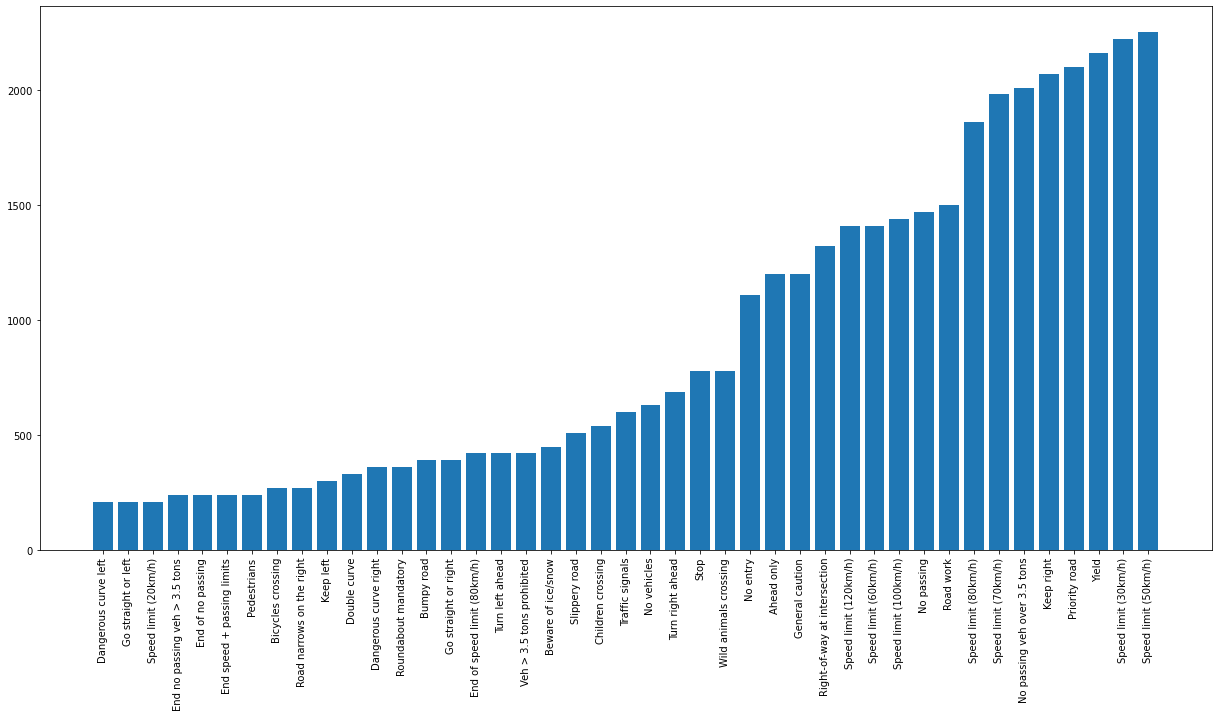

In [5]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

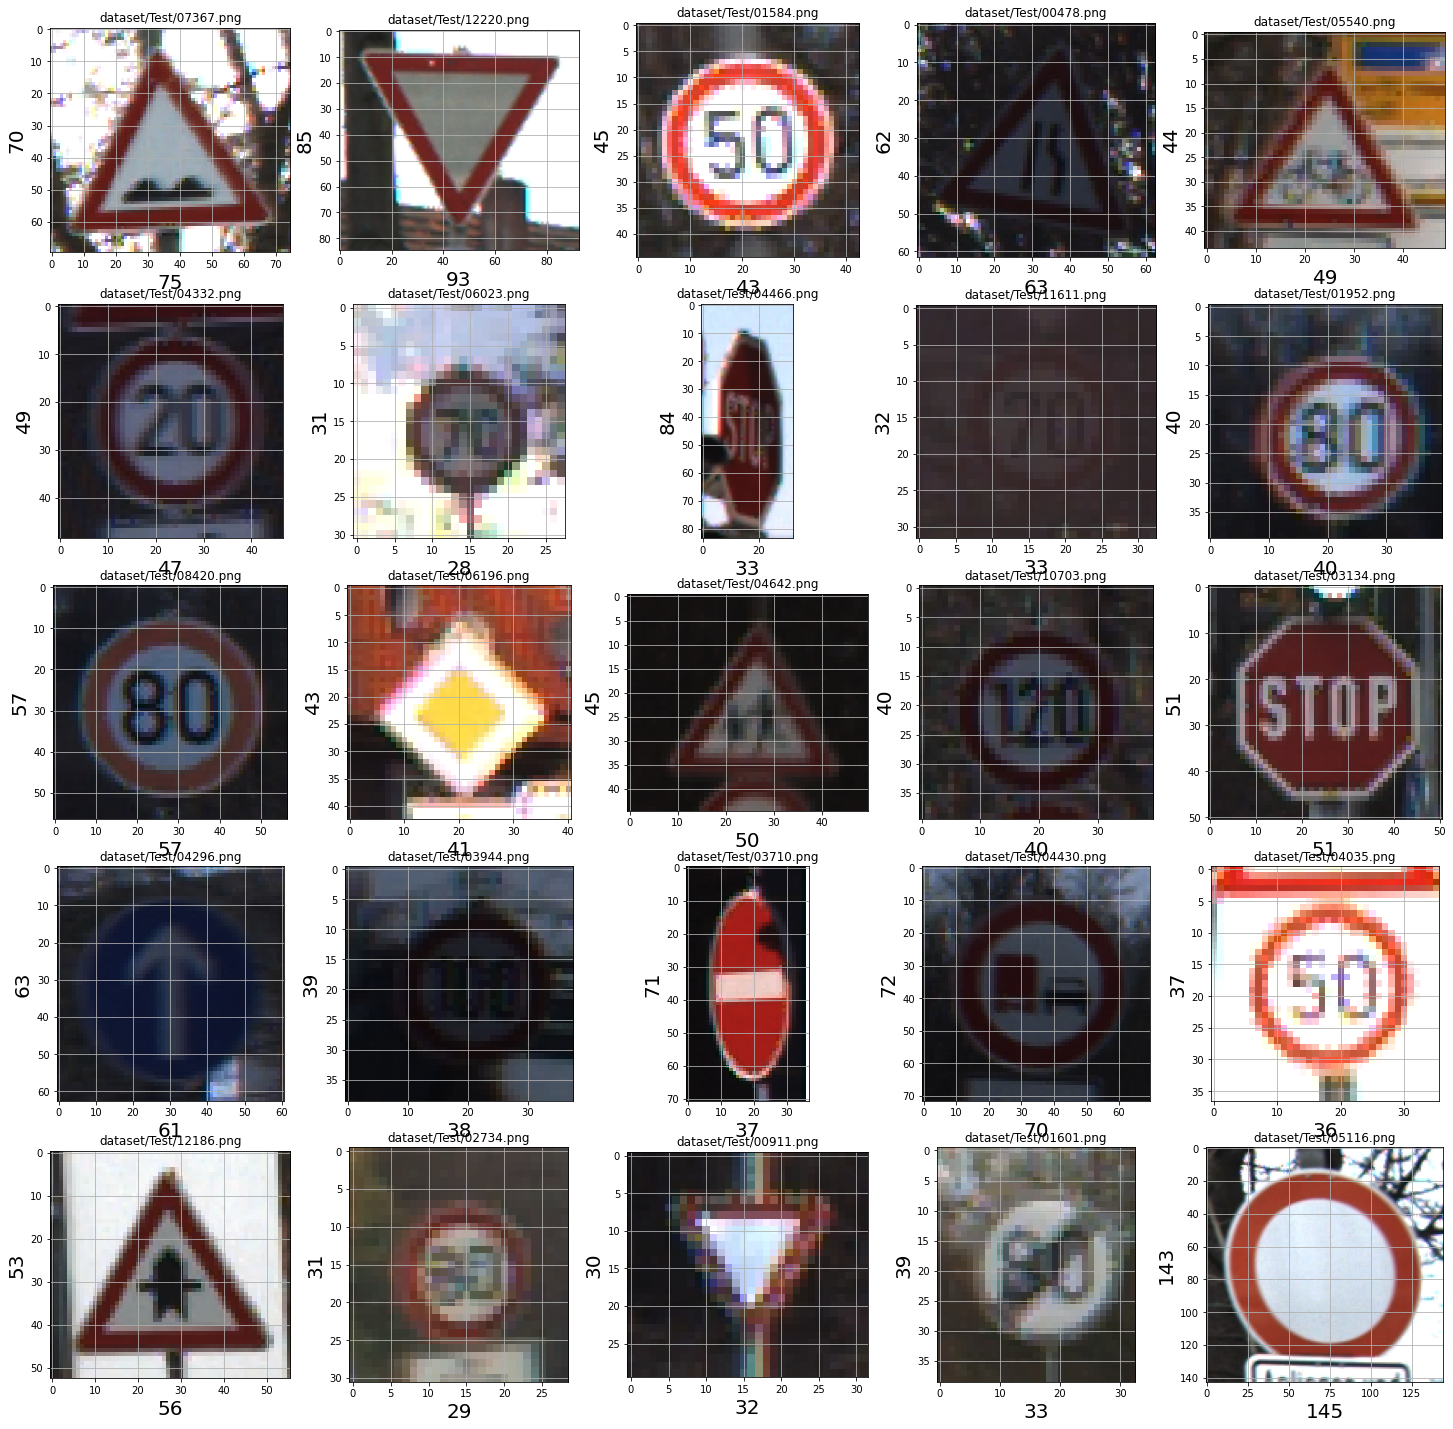

In [6]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.title(random_img_path)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

# Brightness

Text(0.5, 1.0, 'Brighter')

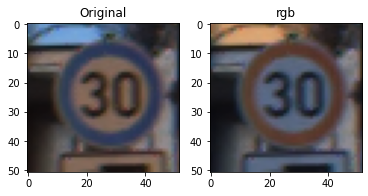

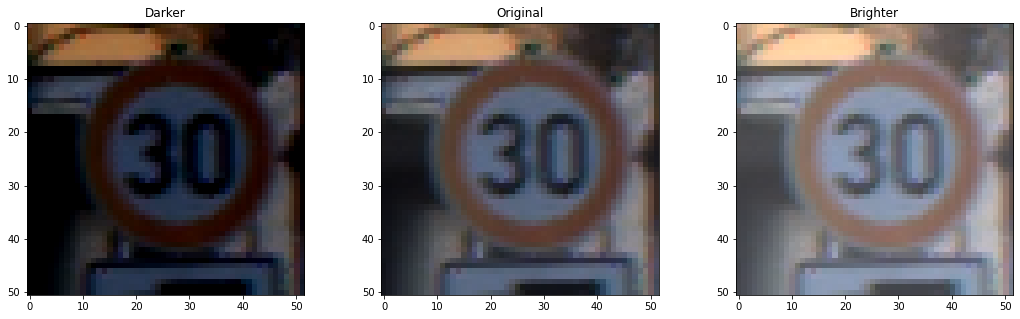

In [7]:
import numpy as np

path = data_dir + "/Test/05373.PNG"
img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB )
plt.subplot(121); plt.imshow(img_bgr); plt.title("Original")
plt.subplot(122); plt.imshow(img_rgb); plt.title("rgb")

matrix=np.ones(img_rgb.shape, dtype = "uint8")*50

img_rgb_brighter = cv2.add(img_rgb,matrix)
img_rgb_datker = cv2.subtract(img_rgb,matrix)

# Show the Images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_datker); plt.title("Darker")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter")

# Contrast

Text(0.5, 1.0, 'High Contrast')

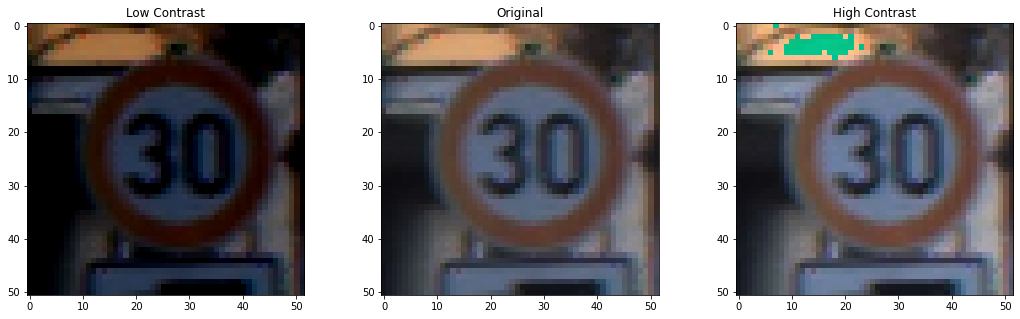

In [33]:
matrix1 = np.ones(img_rgb.shape)* .8
matrix2 = np.ones(img_rgb.shape)* 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the Images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_datker); plt.title("Low Contrast")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("High Contrast")

# Handeling Overflow using np.clip

Text(0.5, 1.0, 'High Contrast 90%')

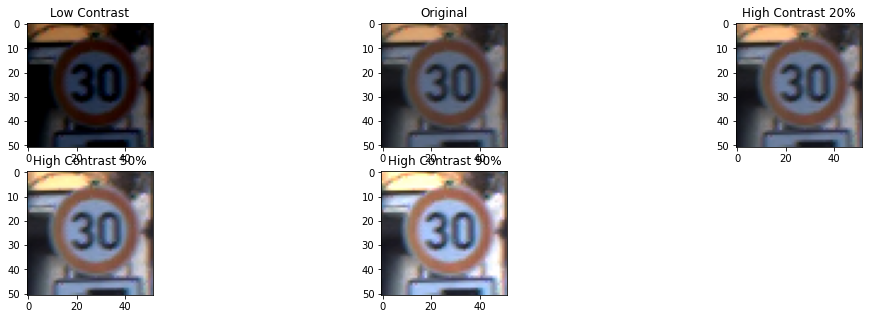

In [42]:
matrix1 = np.ones(img_rgb.shape)* .8
matrix2 = np.ones(img_rgb.shape)* 1.2
matrix3 = np.ones(img_rgb.shape)* 1.5
matrix4 = np.ones(img_rgb.shape)* 1.9

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter1 = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))
img_rgb_brighter2 = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix3),0,255))
img_rgb_brighter3 = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix4),0,255))

# Show the Images
plt.figure(figsize=[18,5])
plt.subplot(231); plt.imshow(img_rgb_datker); plt.title("Low Contrast")
plt.subplot(232); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(233); plt.imshow(img_rgb_brighter1); plt.title("High Contrast 20%")
plt.subplot(234); plt.imshow(img_rgb_brighter2); plt.title("High Contrast 50%")
plt.subplot(235); plt.imshow(img_rgb_brighter3); plt.title("High Contrast 90%")

# Image Thresholding

Text(0.5, 1.0, 'Thresholding adaptive')

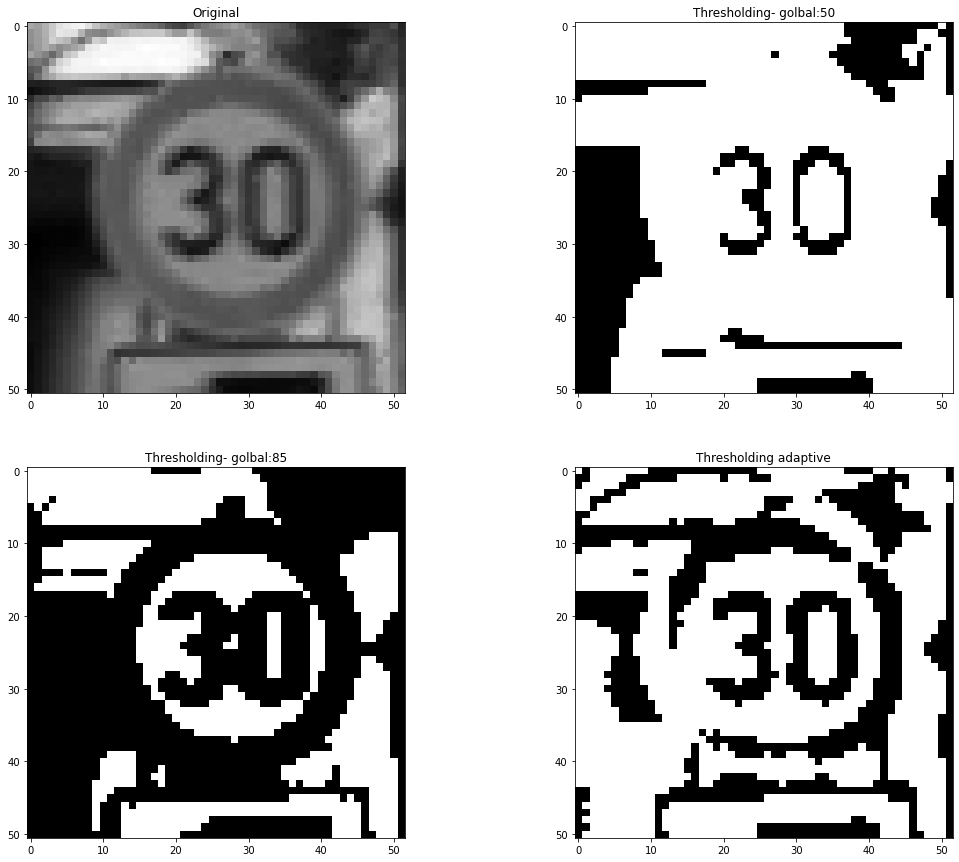

In [40]:
path = data_dir + "/Test/05373.PNG"
img_read = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
retval, img_thresh_gb1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gb2 = cv2.threshold(img_read, 85, 255, cv2.THRESH_BINARY)
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,7)

# Show the Images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read, cmap="gray"); plt.title("Original")
plt.subplot(222); plt.imshow(img_thresh_gb1, cmap="gray"); plt.title("Thresholding- golbal:50")
plt.subplot(223); plt.imshow(img_thresh_gb2, cmap="gray"); plt.title("Thresholding- golbal:85")
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Thresholding adaptive")

# Sharpening An Image using OpenCV 

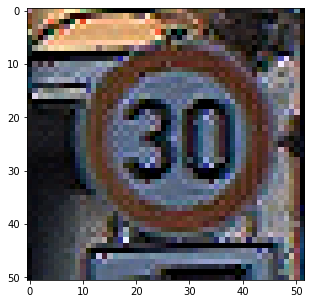

In [45]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_rgb, ddepth=-1, kernel=kernel)
plt.figure(figsize=[5,5])
plt.imshow(image_sharp)

# Sharpening using addweight()

Text(0.5, 1.0, 'sharpened3')

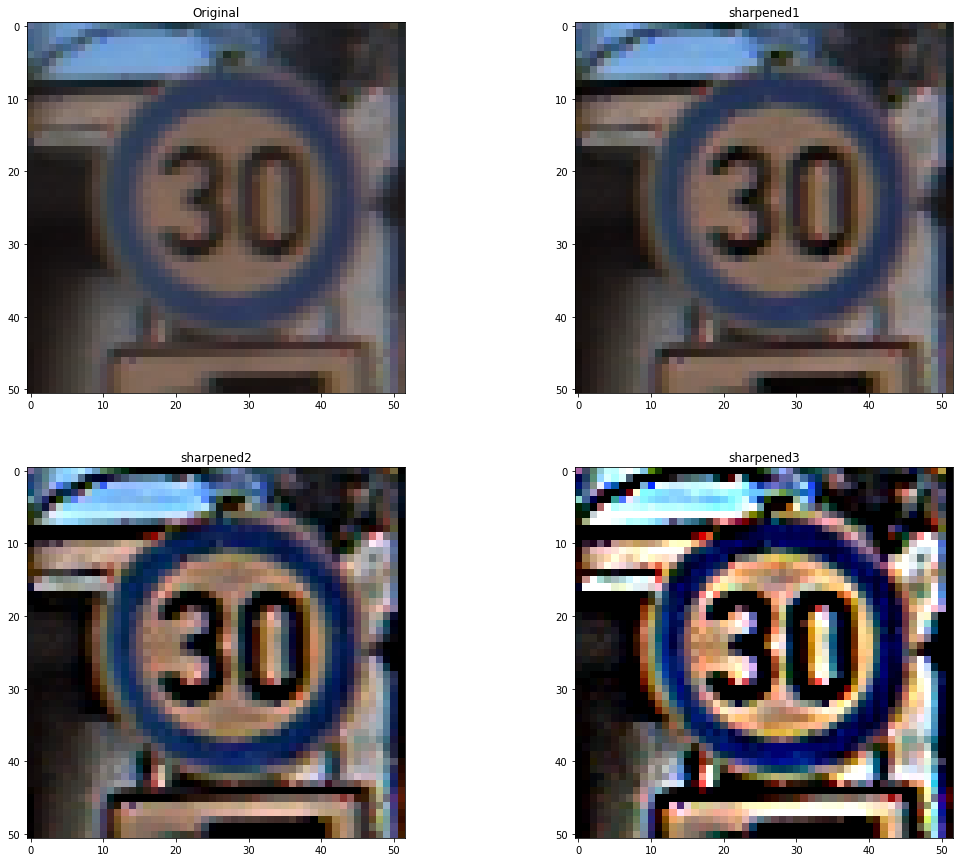

In [52]:
path = data_dir + "/Test/05373.PNG"
img = cv2.imread(path)
gaussian_blur = cv2.GaussianBlur(img, (7,7), 2)

sharpened1 = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5,0)
sharpened2 = cv2.addWeighted(img, 3.5, gaussian_blur, -2.5,0)
sharpened3 = cv2.addWeighted(img, 7.5, gaussian_blur, -6.5,0)

# Show the Images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img); plt.title("Original")
plt.subplot(222); plt.imshow(sharpened1); plt.title("sharpened1")
plt.subplot(223); plt.imshow(sharpened2); plt.title("sharpened2")
plt.subplot(224); plt.imshow(sharpened3); plt.title("sharpened3")

# Histrogram Visualization

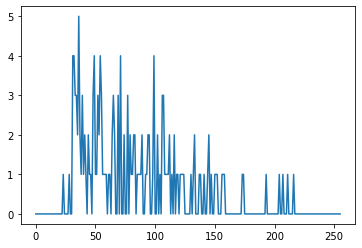

In [41]:
hist = cv2.calcHist(img_rgb,[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

# CLAHE Histogram equalization

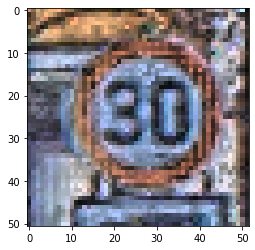

In [50]:
hsv_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
clahe = cv2.createCLAHE(clipLimit = 15.0, tileGridSize = (20,20))
v = clahe.apply(v)

hsv_img = np.dstack((h,s,v))

hist_eq = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(hist_eq);

Text(0.5, 1.0, 'k=100')

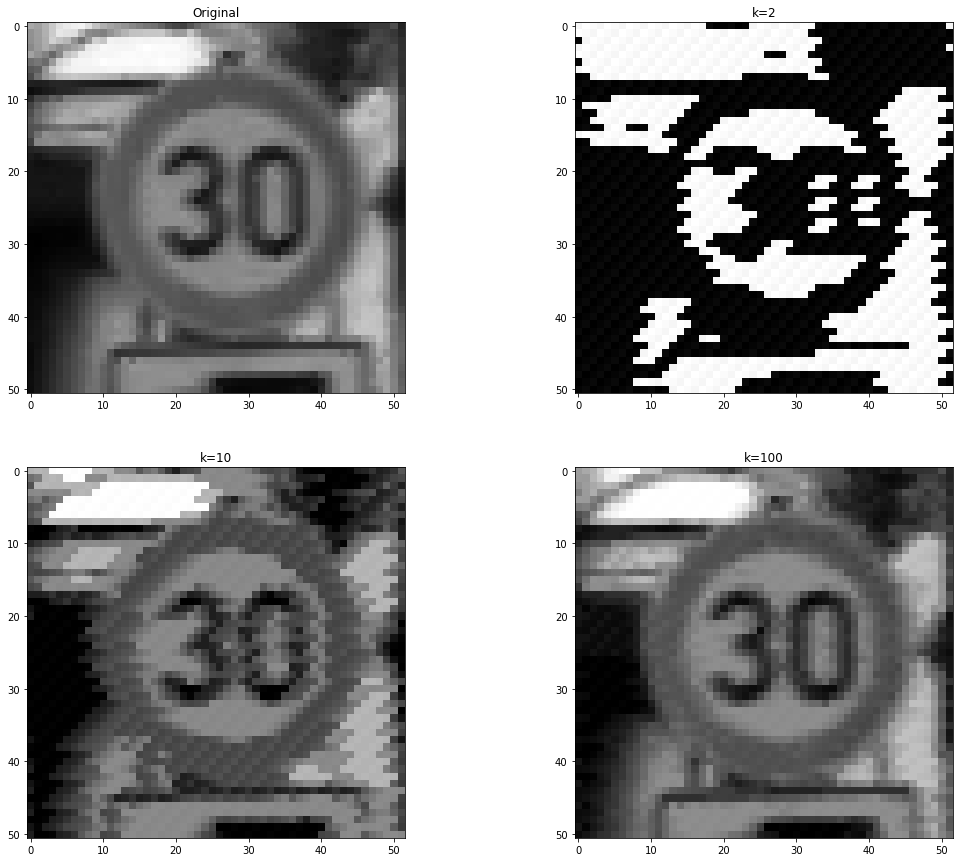

In [15]:
import cv2 as cv
path = data_dir + "/Test/05373.PNG"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
#cv.imshow('res2',res2)
#plt.imshow(res2, cmap="gray")

# k = 10
K = 10
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2_1 = res.reshape((img.shape))
#cv.imshow('res2',res2)
#plt.imshow(res2, cmap="gray")

# k = 100
K = 100
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2_2 = res.reshape((img.shape))
#cv.imshow('res2',res2)
#plt.imshow(res2, cmap="gray")

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(222); plt.imshow(res2, cmap="gray"); plt.title("k=2")
plt.subplot(223); plt.imshow(res2_1, cmap="gray"); plt.title("k=10")
plt.subplot(224); plt.imshow(res2_2, cmap="gray"); plt.title("k=100")

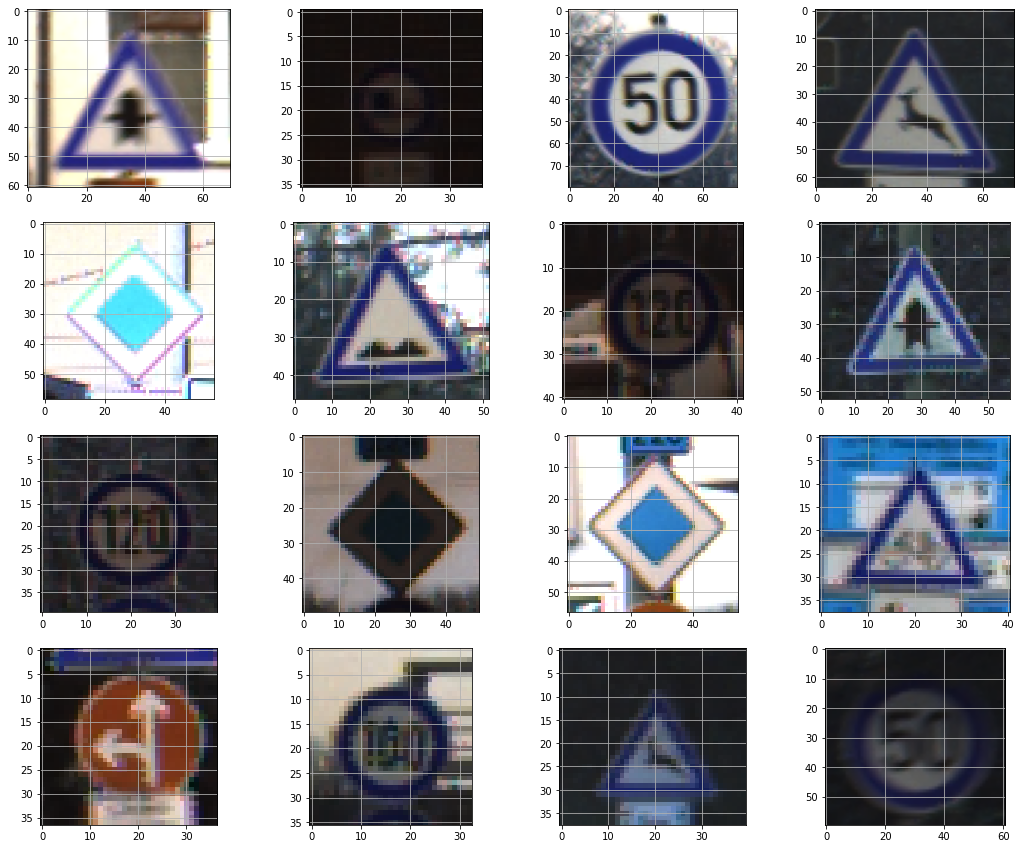

In [25]:
import random
from matplotlib.image import imread
gaussian_blur = cv2.GaussianBlur(img, (7,7), 2)

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
data=[]

plt.figure(figsize=(18,15))

for i in range(1,17):
    random_img_path = data_dir + '/' + random.choice(imgs)
    img = cv2.imread(random_img_path)
    gaussian_blur = cv2.GaussianBlur(img, (7,7), 2)
    rand_img = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5,0)
    data.append(rand_img)
    plt.subplot(4,4,i)
    plt.imshow(rand_img)
    plt.imshow(img)
    plt.grid(b=None)
    #plt.title(random_img_path)
    #plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    #plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


# Collecting the Training Data

In [8]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


# Shuffling the training data

In [9]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

# Splitting the data into train and validation set

In [10]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


# One hot encoding the labels

In [11]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# Making the model

In [12]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [13]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Augmenting the data and training the model

In [14]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 78s 91ms/step - loss: 0.9347 - accuracy: 0.7472 - val_loss: 0.0818 - val_accuracy: 0.9745
Epoch 2/30
858/858 [==============================] - 69s 80ms/step - loss: 0.1626 - accuracy: 0.9522 - val_loss: 0.0337 - val_accuracy: 0.9905
Epoch 3/30
858/858 [==============================] - 64s 74ms/step - loss: 0.1013 - accuracy: 0.9692 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 4/30
858/858 [==============================] - 65s 76ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.0247 - val_accuracy: 0.9927
Epoch 5/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0113 - val_accuracy: 0.9974
Epoch 6/30
858/858 [==============================] - 65s 75ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0134 - val_accuracy: 0.9962
Epoch 7/30
858/858 [==============================] - 71s 83ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0071 - val_accuracy:

In [15]:
model.save("model.h5")

In [16]:
model.save_weights("output")

In [17]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'principal_components',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standa

# Evaluating the model

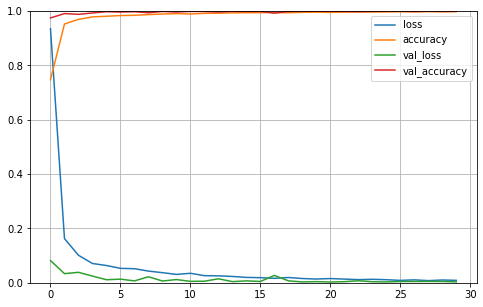

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Loading the test data and running the predictions

In [19]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Test Data accuracy:  98.701504354711


# Visualizing the confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

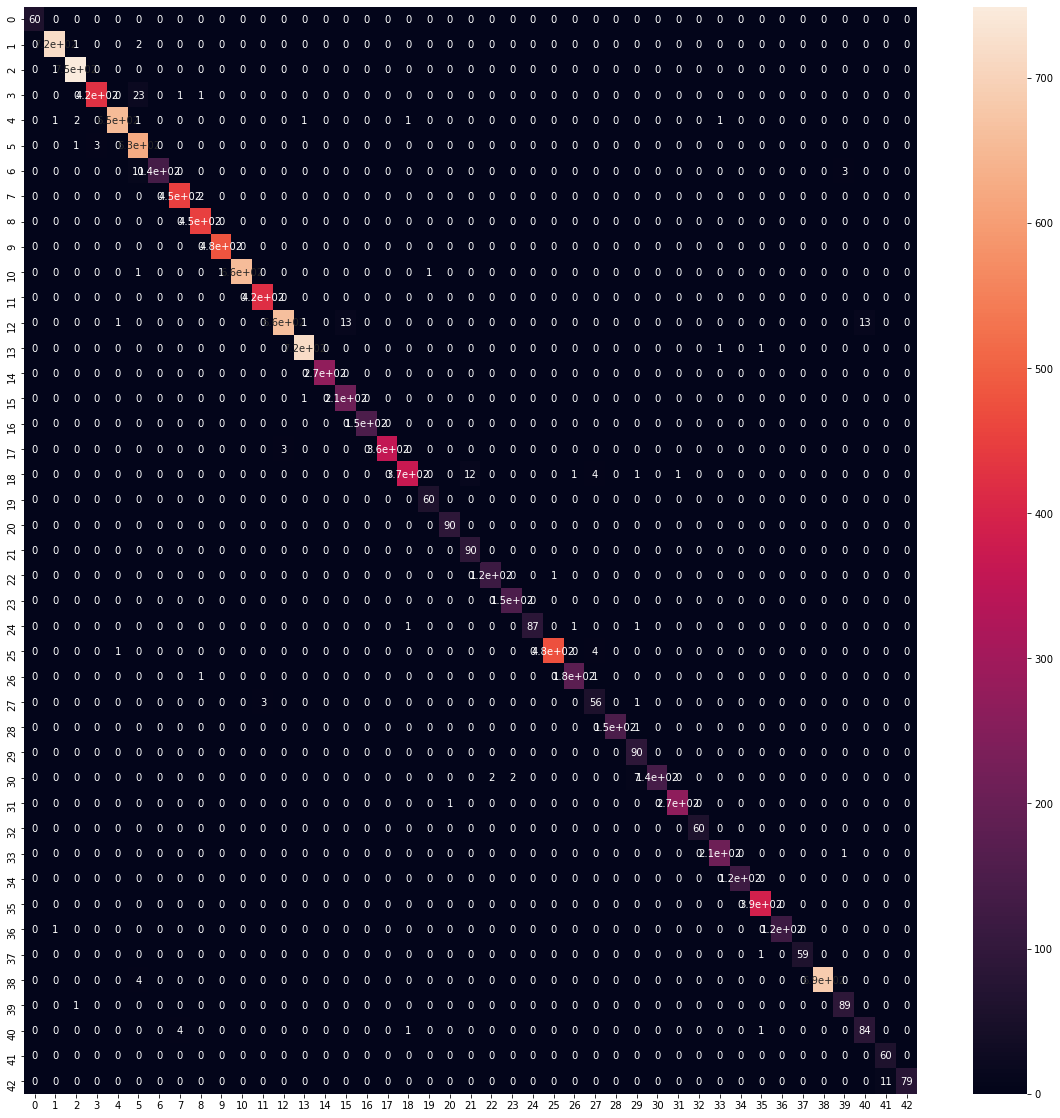

In [21]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

# Classification report

In [22]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       720
           2       0.99      1.00      1.00       750
           3       0.99      0.94      0.97       450
           4       1.00      0.99      0.99       660
           5       0.94      0.99      0.97       630
           6       1.00      0.91      0.95       150
           7       0.99      1.00      0.99       450
           8       0.99      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      1.00      1.00       420
          12       1.00      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

# Predictions on Test Data

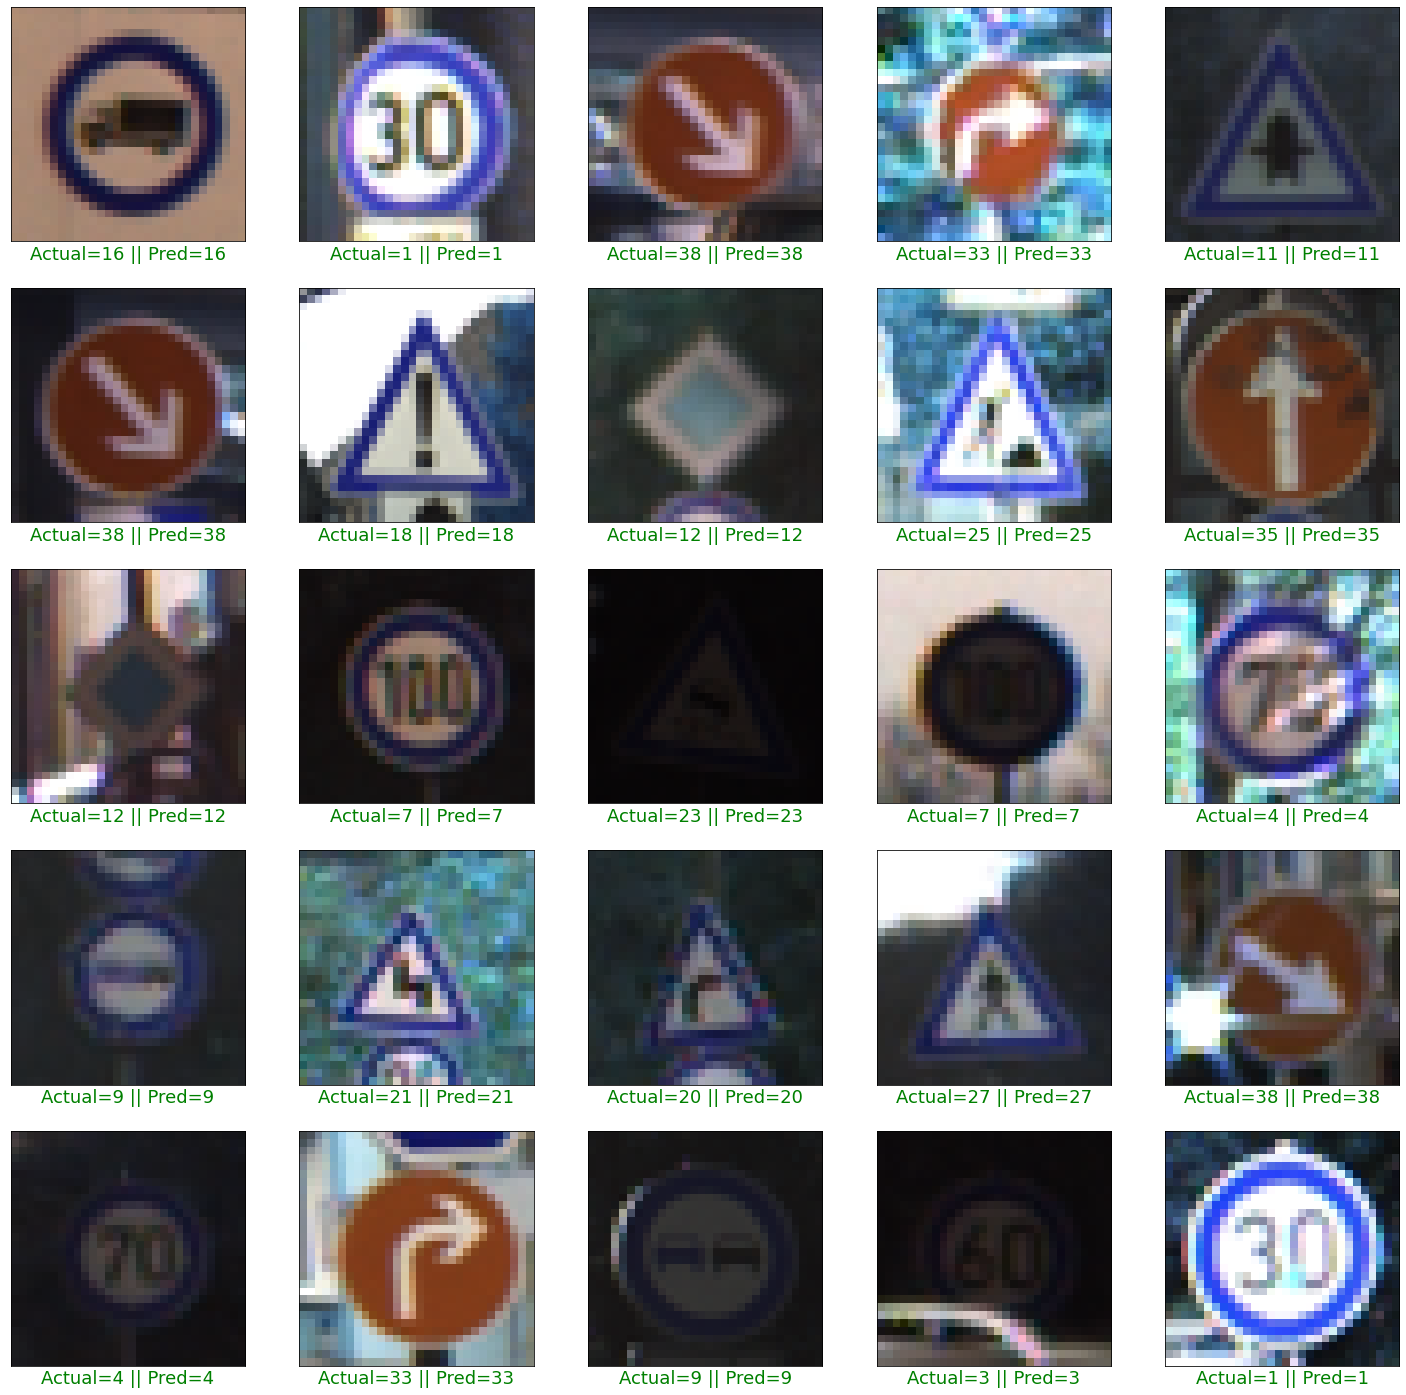

In [23]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col, fontsize=18)
    plt.imshow(X_test[start_index + i])
plt.show()

12


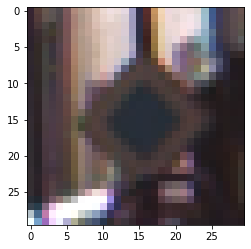

In [35]:
plt.imshow(X_test[10])
prediction = pred[10]
print(prediction)

# Testing on noisy images

In [25]:
noisy_data=[]

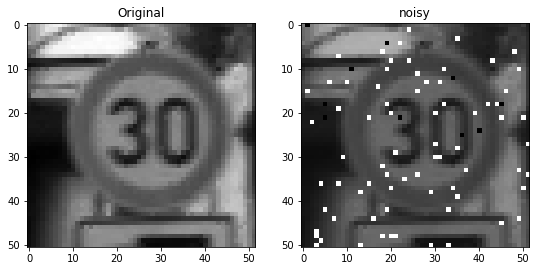

In [90]:
import random
import cv2

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(30, 100)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 3 and 10
	number_of_pixels = random.randint(3 , 10)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
path = data_dir + "/Test/05373.PNG"
#original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[9,8])
plt.subplot(121)
plt.imshow(img,cmap="gray"); plt.title("Original")
plt.subplot(122)
noisy = add_noise(img)
plt.imshow(noisy,cmap="gray"); plt.title("noisy")
#noisy_data.append(np.array(noisy))

#y=model(add_noise(img))
#y = np.array(noisy)
#pred = model.predict(noisy)

In [51]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

      # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

# Testing on noisy images

Text(0.5, 0, 'Actual=13 || Pred=13')

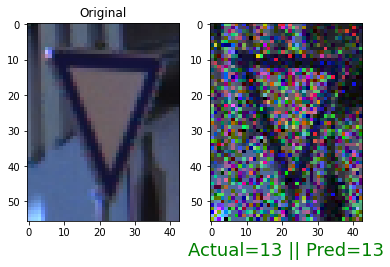

In [40]:
import cv2
import numpy as np
path = data_dir + "/Test/11494.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img); plt.title("Original")

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

plt.subplot(122);plt.imshow(noise)
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("13", noisy_pred[-1]), color = col, fontsize=18)

Text(0.5, 0, 'Actual=13 || Pred=13')

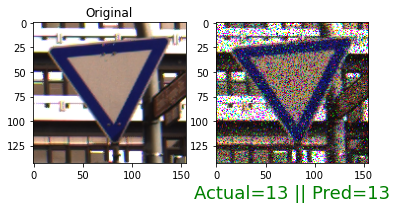

In [33]:
import cv2
import numpy as np
path = data_dir + "/Test/00051.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img); plt.title("Original")

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

plt.subplot(122)
plt.imshow(noise)
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("13", noisy_pred[-1]), color = col, fontsize=18)

Text(0.5, 0, 'Actual=12 || Pred=12')

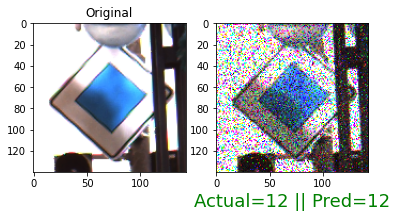

In [35]:
import cv2
import numpy as np
path = data_dir + "/Test/12444.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img);plt; plt.title("Original")

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

plt.subplot(122);plt.imshow(noise)
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("12", noisy_pred[-1]), color = col, fontsize=18)

Text(0.5, 0, 'Actual=40 || Pred=40')

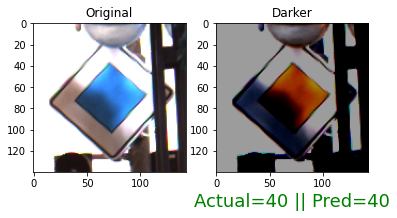

In [39]:
path = data_dir + "/Test/12444.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img);plt; plt.title("Original")

img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB )

matrix=np.ones(img_rgb.shape, dtype = "uint8")*99

noise= cv2.subtract(img_rgb,matrix)

plt.subplot(122);plt.imshow(noise); plt.title("Darker")
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("40", noisy_pred[-1]), color = col, fontsize=18)

Text(0.5, 0, 'Actual=1 || Pred=1')

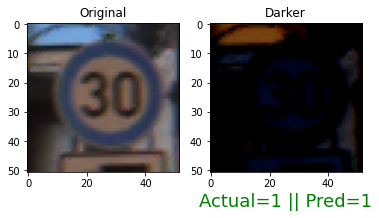

In [38]:
path = data_dir + "/Test/05373.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img); plt.title("Original")

img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB )

matrix=np.ones(img_rgb.shape, dtype = "uint8")*99

noise= cv2.subtract(img_rgb,matrix)

plt.subplot(122);plt.imshow(noise); plt.title("Darker")
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("1", noisy_pred[-1]), color = col, fontsize=18)

<ipython-input-51-d71ac669038e>:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-51-d71ac669038e>:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


Text(0.5, 0, 'Actual=14 || Pred=14')

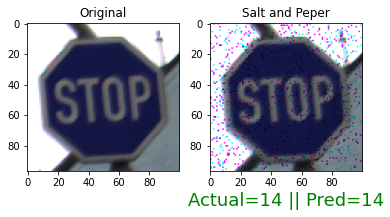

In [53]:
path = data_dir + "/Test/00093.PNG"
img = cv2.imread(path)
plt.subplot(121);plt.imshow(img); plt.title("Original")
noise = noisy("s&p",img)

plt.subplot(122);plt.imshow(noise); plt.title("Salt and Peper")
noise_image_fromarray = Image.fromarray(noise, 'RGB')
noise_resize_image = noise_image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
noisy_data.append(np.array(noise_resize_image))
noisy_test = np.array(noisy_data)
noisy_test = noisy_test/255
noisy_pred = model.predict_classes(noisy_test)
plt.imshow(noise)
plt.xlabel('Actual={} || Pred={}'.format("14", noisy_pred[-1]), color = col, fontsize=18)

In [ ]:
import cv2
import numpy as np

path = data_dir + "/Test/00088.PNG"
img = cv2.imread(path)

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

cv2.imshow('a',noise)
cv2.waitKey(0)